In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
from pathlib import Path
import h5py
import scipy.stats
import torch
import pandas as pd
import os
import math

import bnn_priors.plot as plot
import bnn_priors.exp_utils as exp_utils
from bnn_priors.notebook_utils import collect_runs, unique_cols

In [4]:
df = collect_runs("/scratches/huygens/ag919/BNN-priors/logs/0_42_uci_lr")

df[unique_cols(df.dropna())]

""
0
1
2
3
4
...
109
110
111
112


In [6]:
df[df.status]

,batch_size,batchnorm,bias_loc,bias_prior,bias_scale,burnin,cycles,data,depth,device,...,status,stop_time,the_dir,weight_decay,n_epochs,result.ece,result.ace,result.rmsce,fail_trace,result
0,125.0,True,0.0,gaussian,1.0,0.0,100.0,UCI_protein,3.0,try_cuda,...,COMPLETED,2021-01-09T21:02:34.523821,/scratches/huygens/ag919/BNN-priors/logs/0_42_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UCI_boston,NaN,NaN,...,FAILED,NaN,/scratches/huygens/ag919/BNN-priors/logs/0_42_...,0.0,10000.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mnist,NaN,NaN,...,COMPLETED,NaN,/scratches/huygens/ag919/BNN-priors/logs/0_42_...,0.0,1000.0,0.008389,0.000892,0.003873,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UCI_boston,NaN,NaN,...,FAILED,NaN,/scratches/huygens/ag919/BNN-priors/logs/0_42_...,0.0,10000.0,NaN,NaN,NaN,NaN,NaN
4,125.0,True,0.0,gaussian,1.0,0.0,100.0,mnist,3.0,try_cuda,...,COMPLETED,2021-01-09T21:42:14.695354,/scratches/huygens/ag919/BNN-priors/logs/0_42_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,125.0,True,0.0,gaussian,1.0,0.0,100.0,UCI_protein,3.0,try_cuda,...,FAILED,2021-01-09T21:20:31.569259,/scratches/huygens/ag919/BNN-priors/logs/0_42_...,NaN,NaN,NaN,NaN,NaN,"[Traceback (most recent call last):\n, File ...",NaN
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UCI_protein,NaN,NaN,...,COMPLETED,NaN,/scratches/huygens/ag919/BNN-priors/logs/0_42_...,0.0,1000.0,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UCI_boston,NaN,NaN,...,FAILED,NaN,/scratches/huygens/ag919/BNN-priors/logs/0_42_...,0.0,10000.0,NaN,NaN,NaN,NaN,NaN
112,125.0,True,0.0,gaussian,1.0,0.0,100.0,UCI_protein,3.0,try_cuda,...,COMPLETED,2021-01-09T21:21:53.136395,/scratches/huygens/ag919/BNN-priors/logs/0_42_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
verlet_df = df[(df["status"] == "COMPLETED")]

verlet_df.sort_values(["data", "lr", "inference"])[["data", "lr", "inference", "result.acc_ensemble", "result.acc_last"]]

,data,lr,inference,result.acc_ensemble,result.acc_last
32,UCI_boston,0.00001,HMCReject,9.024985e-02,0.110463
74,UCI_boston,0.00001,SGLDReject,9.088820e-02,0.074778
40,UCI_boston,0.00001,VerletSGLDReject,6.381985e-02,0.082425
70,UCI_boston,0.00010,HMCReject,8.614542e-02,0.104322
54,UCI_boston,0.00010,SGLDReject,5.955861e-02,0.063194
9,UCI_boston,0.00010,VerletSGLDReject,1.307726e-01,0.082513
79,UCI_boston,0.00100,HMCReject,6.562030e-02,0.120693
92,UCI_boston,0.00100,SGLDReject,6.069511e-02,0.104662
80,UCI_boston,0.00100,VerletSGLDReject,6.065281e-02,0.091469
58,UCI_boston,0.01000,HMCReject,5.731147e-02,0.085320


No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'UCI_boston')

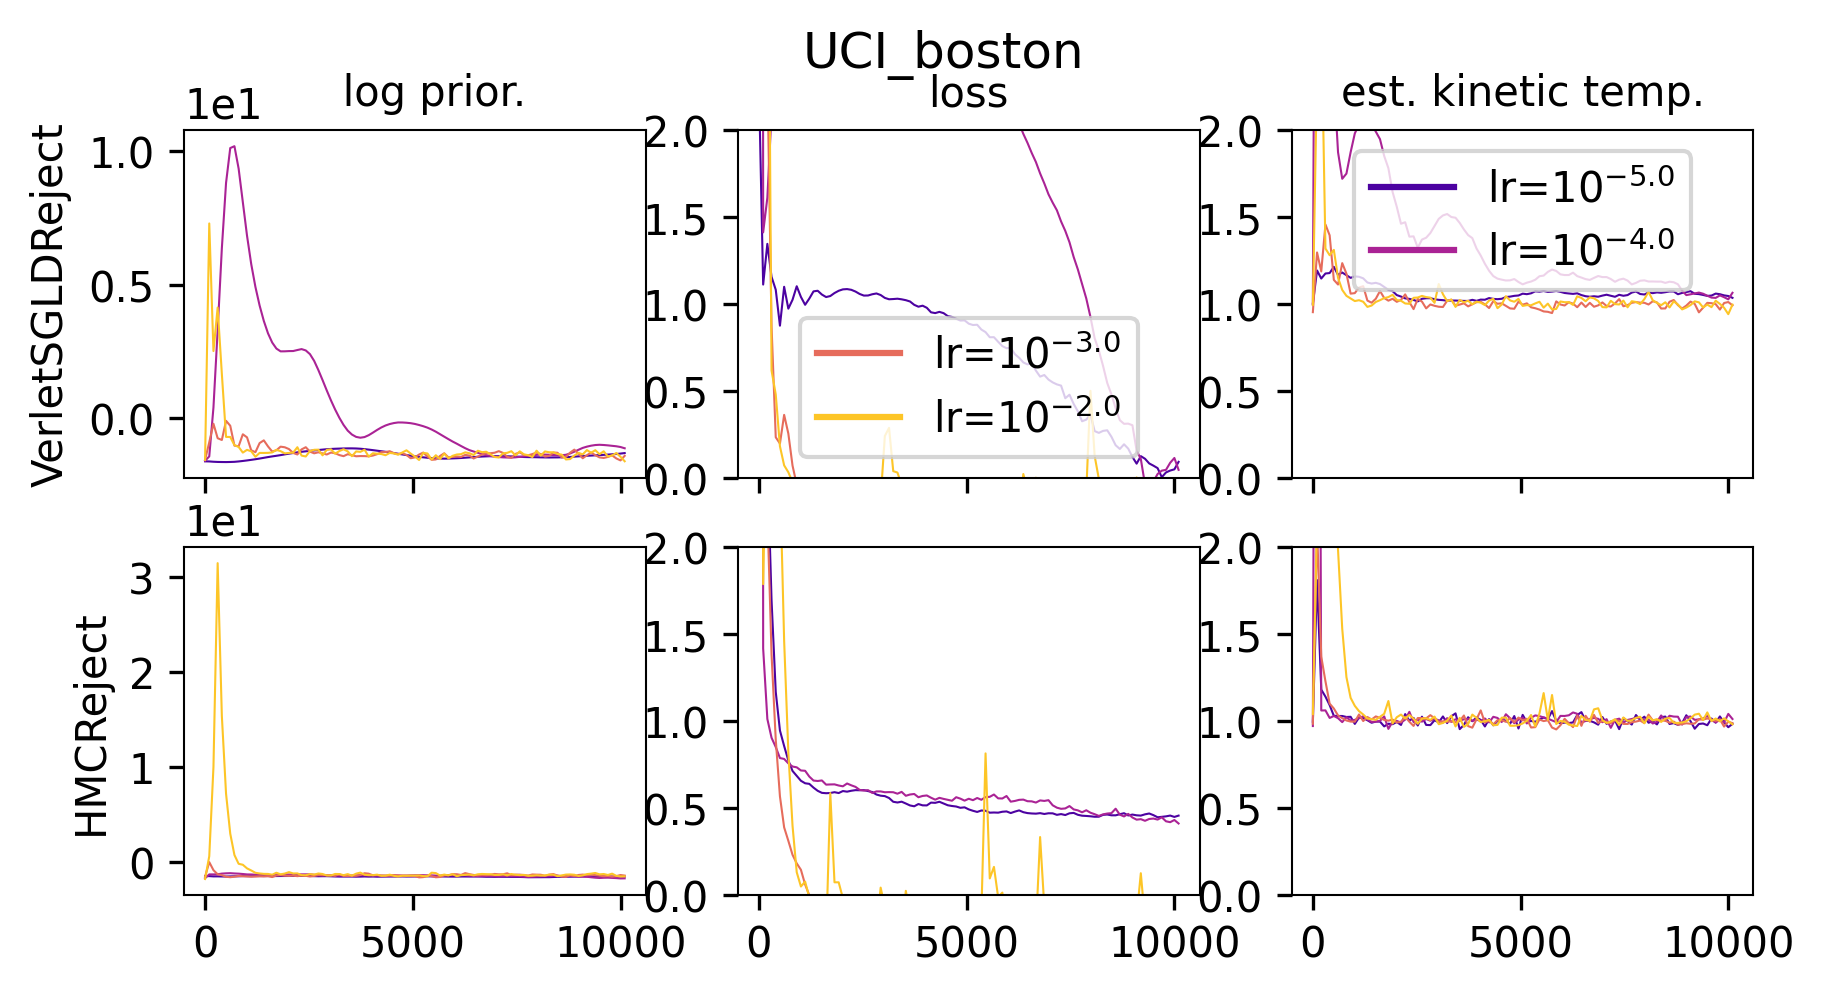

In [210]:
plt.rcParams.update({
    "font.family": "sans-serif",  # use serif/main font for text elements
    "text.usetex": False,     # use inline math for ticks
    "pgf.rcfonts": True,     # don't setup fonts from rc parameters
    "font.size": 10,
    "axes.linewidth": 0.5,
    "figure.dpi": 300,
})

fig_width_pt = 487.8225
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches


fig, all_axes = plt.subplots(2, 3, figsize=(fig_width, fig_width/2), facecolor='white')

import matplotlib
import math
labelsize= matplotlib.rcParams['axes.labelsize']

def log_accept_prob(x):
    return -x/500

def metrics_exist(the_dir):
    return os.path.exists(os.path.join(the_dir, "metrics.h5"))

inference = "VerletSGLDReject"
dataset = "UCI_boston"


completed_df = df[(df["status"] == "COMPLETED")
                  & (df["inference"] == inference)
                  & (df["data"] == dataset)]

min_log_lr = math.log(df["lr"].min(), 10) - .5
max_log_lr = math.log(df["lr"].max(), 10) + .5
_cmap = plt.get_cmap('plasma')

def lr_cmap(log_lr):
    x = (log_lr - min_log_lr) / (max_log_lr- min_log_lr)
    return _cmap(x)
    

axes = all_axes[0]
for i_order, idx in enumerate(completed_df.sort_values("lr").index):
    log_lr = round(math.log(completed_df.loc[idx, 'lr'], 10)*10) / 10
    
    color_kwargs = dict(color=lr_cmap(log_lr), alpha=1)
    #color_kwargs = dict(color="C1", alpha=1)
    plot_kwargs = dict(**color_kwargs, label=None, linewidth=0.5)
    label=f"lr=$10^{{{log_lr}}}$"
    
    with h5py.File(Path(completed_df.loc[idx, "the_dir"], "metrics.h5"), "r", swmr=True) as metrics:
        is_sample_mask = (metrics['acceptance/is_sample'][:] == 1)
        #is_sample_mask = ~np.isnan(metrics['log_prior'])
        #is_sample_mask = slice(None)
        ax = axes[0]
        plot.metric(ax, metrics, "log_prior", transform=log_accept_prob,
                    plot_kwargs=plot_kwargs, mask=is_sample_mask, legend=False)
        ax.set_title("   log prior.", fontsize=labelsize)
        #plot.vlines(ax, metrics, is_sample_mask)
        
        ax = axes[1]
        plot.metric(ax, metrics, "loss", mask=is_sample_mask, plot_kwargs=plot_kwargs, legend=False)
        ax.set_title("loss", fontsize=labelsize)
        #plot.vlines(ax, metrics, is_sample_mask)
        if i_order >= 2:
            ax.plot([], [], **color_kwargs, label=label)
        ax.legend(loc='lower center')
        
        ax = axes[2]
        plot.metric(ax, metrics, "est_temperature/all", mask=is_sample_mask, plot_kwargs=plot_kwargs, legend=False)
        ax.set_title("est. kinetic temp.", fontsize=labelsize)
        #plot.vlines(ax, metrics, is_sample_mask)
        if i_order < 2:
            ax.plot([], [], **color_kwargs, label=label)
        ax.legend(loc='upper center')
            
axes[0].set_ylabel(inference)

        
inference = "HMCReject"
temperature = 1.0
cmap = plt.get_cmap('plasma')

completed_df = df[(df["status"] == "COMPLETED")
                  & (df["inference"] == inference)
                  & (df["data"] == dataset)]
axes = all_axes[1]
for i_order, idx in enumerate(completed_df.sort_values("lr").index):
    log_lr = round(math.log(completed_df.loc[idx, 'lr'], 10)*10) / 10
    
    color_kwargs = dict(color=lr_cmap(log_lr), alpha=1)
    #color_kwargs = dict(color="C1", alpha=1)
    plot_kwargs = dict(label=f"$\\log_{{10}}$ lr$={{{log_lr}}}$", **color_kwargs, linewidth=0.5)
    
    with h5py.File(Path(completed_df.loc[idx, "the_dir"], "metrics.h5"), "r", swmr=True) as metrics:
        is_sample_mask = (metrics['acceptance/is_sample'][:] == 1)
        #is_sample_mask = ~np.isnan(metrics['log_prior'])
        #is_sample_mask = slice(None)
        ax = axes[0]
        plot.metric(ax, metrics, "log_prior", transform=log_accept_prob,
                    plot_kwargs=plot_kwargs, mask=is_sample_mask, legend=False)
        #ax.set_title("log accept prob.")
        #plot.vlines(ax, metrics, is_sample_mask)
        
        ax = axes[1]
        plot.metric(ax, metrics, "loss", mask=is_sample_mask, plot_kwargs=plot_kwargs, legend=False)
        #ax.set_title("potential")
        #plot.vlines(ax, metrics, is_sample_mask)
        
        ax = axes[2]
        plot.metric(ax, metrics, "est_temperature/all", mask=is_sample_mask, plot_kwargs=plot_kwargs, legend=False)
        #ax.set_title("est_temperature/all")
        #plot.vlines(ax, metrics, is_sample_mask)
axes[0].set_ylabel(inference)

for ax in all_axes[0]:
    ax.set(xticklabels=[])
for axes in all_axes:
    #axes[0].set_ylim((-10000, 100))
    axes[0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    #for a in axes:
    #    a.set_xlim((200000, 290000))
    #axes[0].set_xlim((399500, 404500))
    axes[1].set_ylim((0, 2))
    #axes[1].set_xlim((399500, 404500))
    #axes[2].set_ylim((0.99, 1.12))
    axes[2].set_ylim((0, 2))
    #axes[2].set_xlim((399500, 404500))

fig.suptitle(dataset)   
#all_axes[1, 1].set_xlabel("number of minibatch steps (1 epoch = 400 minibatches)")
#fig.savefig("../figures/mcmc/accept_prob_googleresnet_cifar10.pdf", bbox_inches='tight')

(0.0, 10.0)

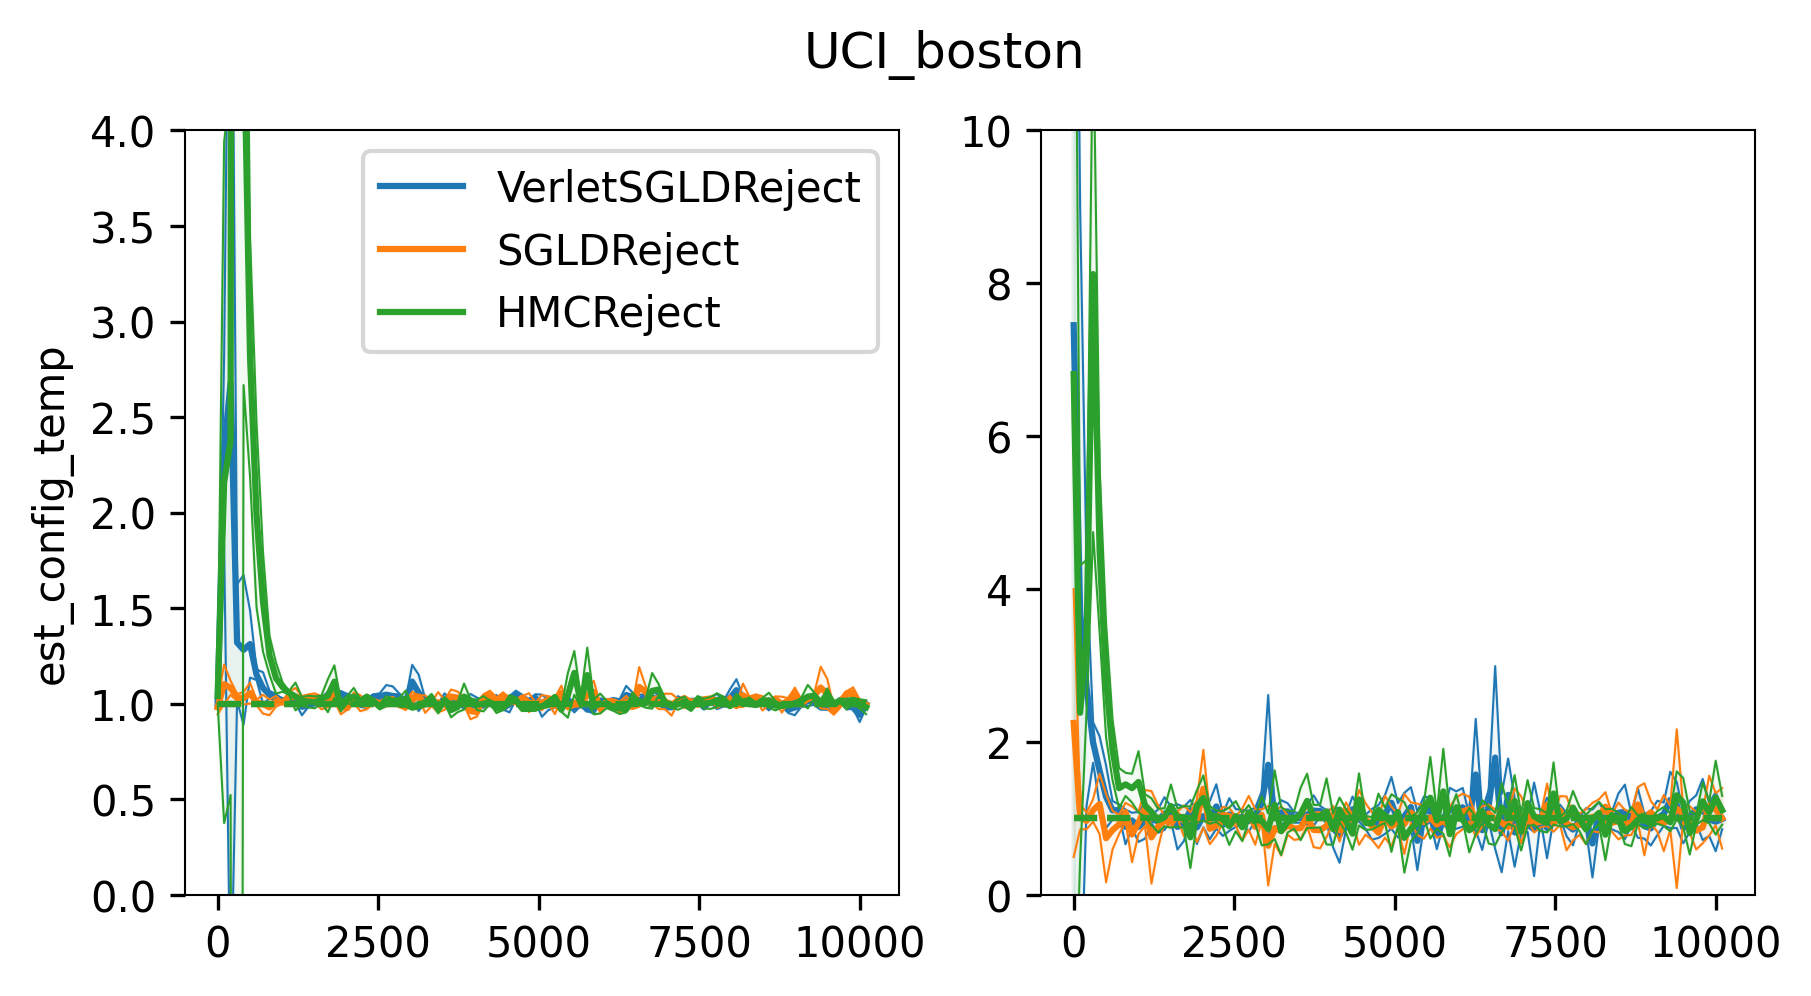

In [195]:
dataset = "UCI_boston"
lr = 0.01

fig, axes = plt.subplots(1, 2, figsize=(fig_width, fig_width*1/2))
fig.suptitle(dataset)
for inference in ["VerletSGLDReject", "SGLDReject", "HMCReject"]:
    completed_df = df[(df["status"] == "COMPLETED")
                      & (df["inference"] == inference)
                      & (df["data"] == dataset)
                      & (df["lr"] == lr)]
    
    if not len(completed_df) == 1:
        print(completed_df)
        continue
    
    with h5py.File(Path(completed_df["the_dir"].iloc[0])/"metrics.h5", "r", swmr=True) as metrics:
        #mask = ~np.isnan(metrics["est_temperature/all"])
        mask = (metrics["acceptance/is_sample"][:] == 1)
        plot.temperature_stderr(axes[0], metrics, "est_temperature", sizes, label=inference, legend=True, mask=mask)
        plot.temperature_stderr(axes[1], metrics, "est_config_temp", sizes, label=inference, legend=False, mask=mask)
        axes[0].set_ylabel("est_temperature")
        axes[0].set_ylabel("est_config_temp")

axes[0].set_ylim(0, 4)
axes[1].set_ylim(0, 10)

In [204]:
one_type = df[(df["status"] == "COMPLETED")
                      & (df["data"] == "mnist")
                      & (df["lr"] == 1e-4)].dropna( subset=["inference"])

one_type[unique_cols(one_type)]

,inference,momentum,seed
4,HMCReject,1.000000,153915614.0
24,VerletSGLDReject,0.999361,886135547.0
68,SGLDReject,0.999361,359229102.0


Text(0.5, 0.98, 'mnist')

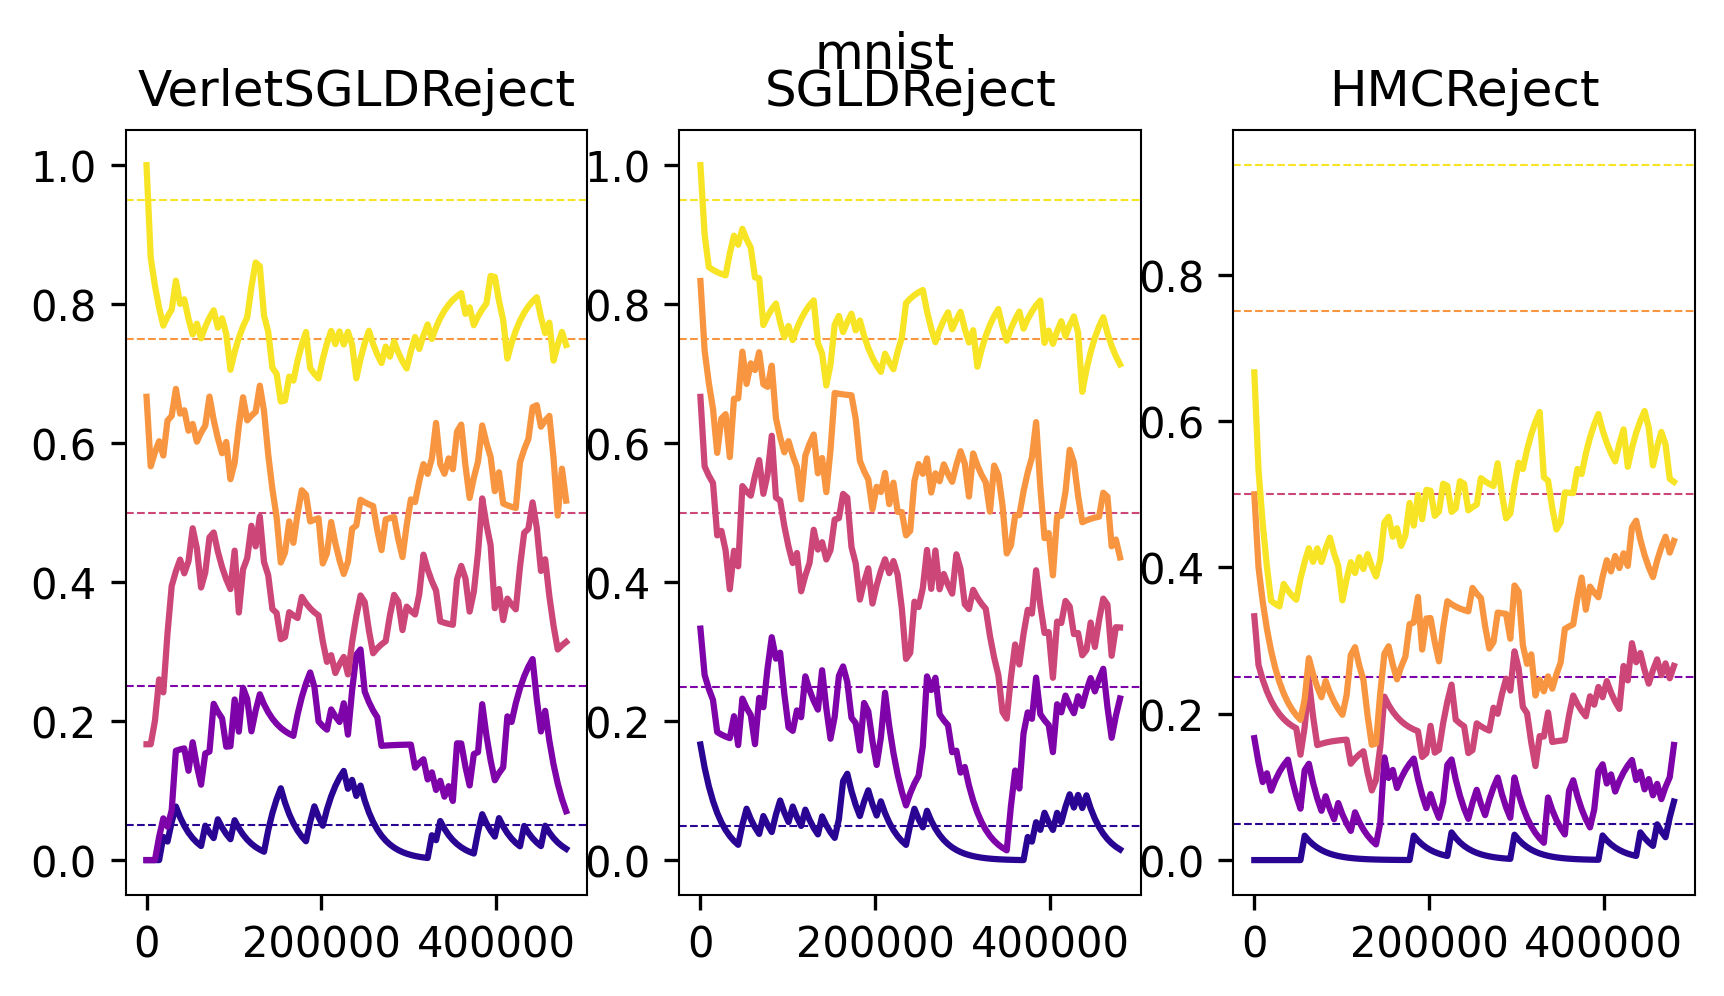

In [191]:
dataset = "mnist"
lr = 0.0001

fig, axes = plt.subplots(1, 3, figsize=(fig_width, fig_width*1/2))
for i, inference in enumerate(["VerletSGLDReject", "SGLDReject", "HMCReject"]):
    completed_df = df[(df["status"] == "COMPLETED")
                      & (df["inference"] == inference)
                      & (df["data"] == dataset)
                      & (df["lr"] == lr)]
    
    if not len(completed_df) == 1:
        print(completed_df)
        continue
    
    with h5py.File(Path(completed_df["the_dir"].iloc[0])/"metrics.h5", "r", swmr=True) as metrics:
        #mask = ~np.isnan(metrics["est_temperature/all"])
        mask = (metrics["acceptance/is_sample"][:] == 1)
        plot.kinetic_temperature_intervals(axes[i], metrics, sizes_convnet, label=inference,
                                           legend=False, mask=mask, ewma_alpha=0.8)
        axes[i].set_title(inference)
fig.suptitle(dataset)


In [100]:
sizes_convnet = sizes

In [102]:
with open(Path(completed_df.dropna(subset=["inference"]).iloc[0, :]["the_dir"])/"config.json", "r") as f:
    config = json.load(f)

device = torch.device("cpu")  # can be CUDA instead
data = exp_utils.get_data(config["data"], device)
model = exp_utils.get_model(x_train=data.norm.train_X, y_train=data.norm.train_y,
                            **{k: v for k, v in config.items() if k in set((
                               "model",
                               "width", "depth", "weight_prior", "weight_loc", "weight_scale",
                               "bias_prior", "bias_loc", "bias_scale", "batchnorm",
                               "weight_prior_params", "bias_prior_params"))})

print(f"Loaded model of kind {config['model']}")
config["temperature"]

Loaded model of kind densenet


1.0

In [103]:
sizes = plot.get_sizes(model)

data
UCI_boston     AxesSubplot(0.125,0.125;0.775x0.755)
UCI_protein    AxesSubplot(0.125,0.125;0.775x0.755)
mnist          AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

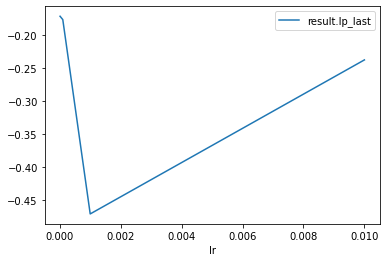

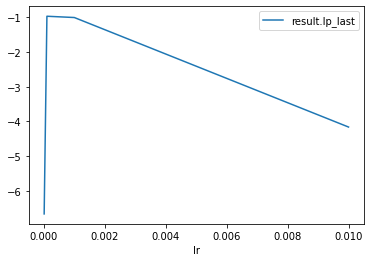

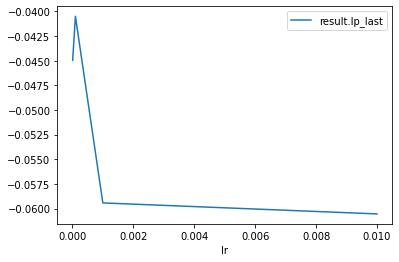

In [38]:
verlet_df = df[(df["status"] == "COMPLETED") & (df["inference"] == "VerletSGLDReject")]

verlet_df.sort_values(["data", "lr"]).groupby("data").plot(x="lr", y="result.lp_last")


In [160]:
neal_df = collect_runs("/scratches/huygens/ag919/BNN-priors/logs/1_0_neal_funnel")
df_comp = neal_df[neal_df["status"] == "COMPLETED"]

In [161]:
len(df_comp[df_comp["lr"] == 1e-4])

520

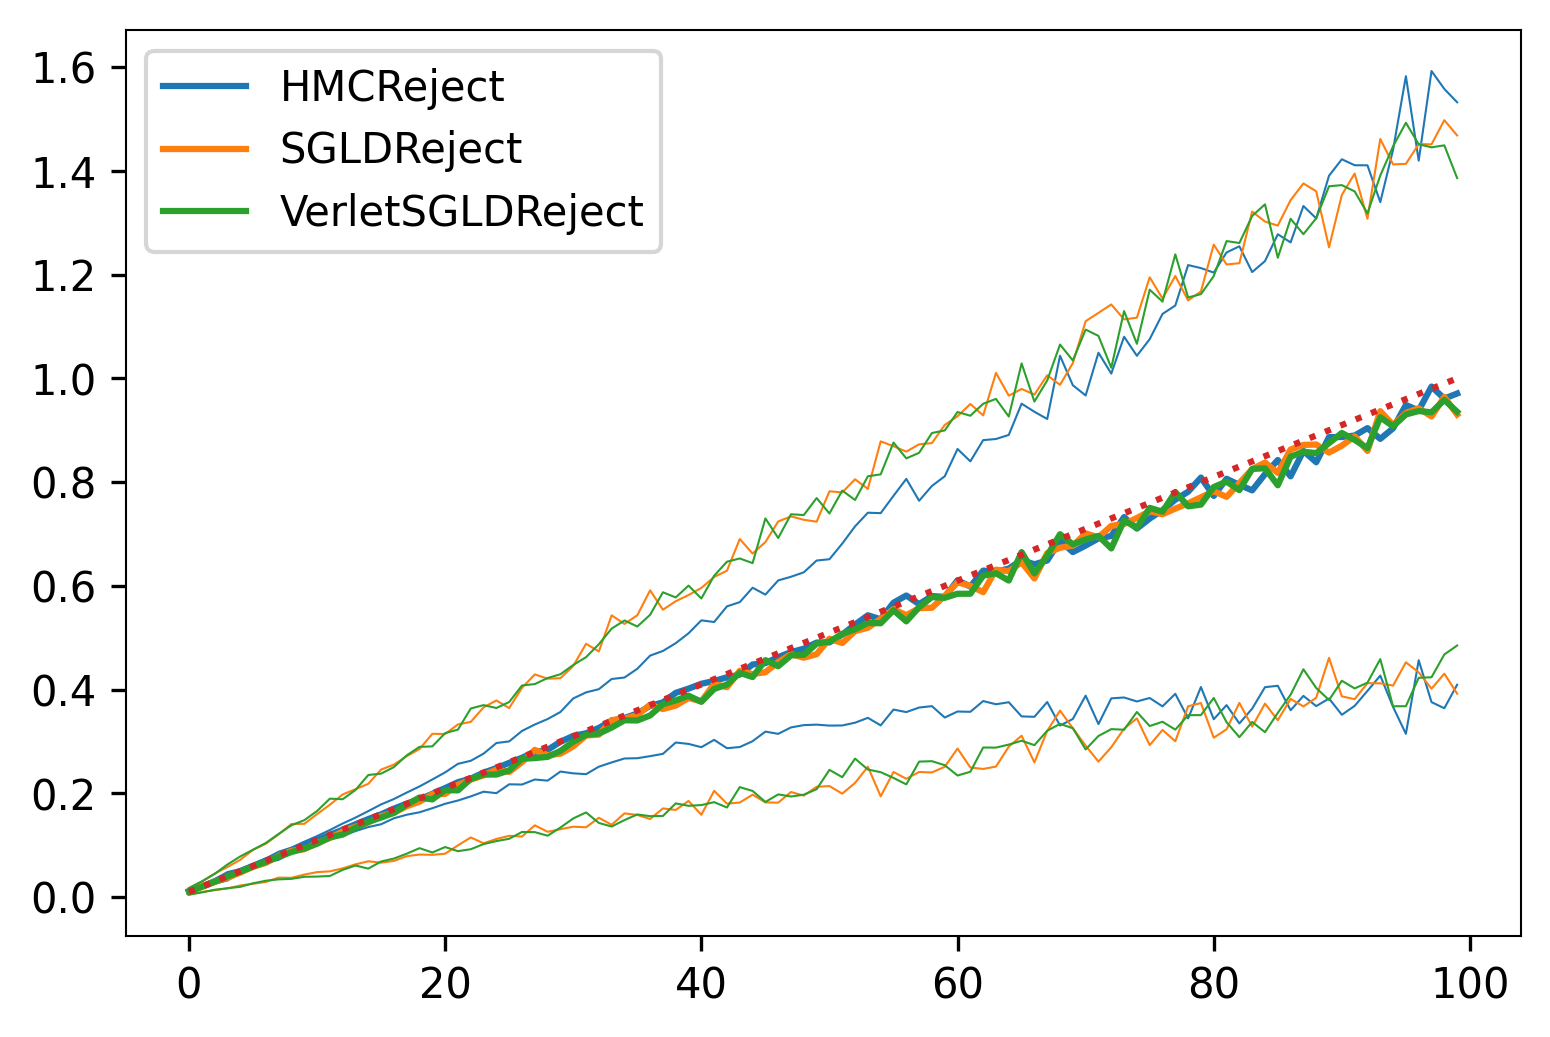

In [167]:
these_runs = df_comp[df_comp["lr"] == 1e-4]

avgs = {}
for _, run in these_runs.iterrows():
    inference = run["inference"]
    if inference not in avgs:
        avgs[inference] = []
    avgs[inference].append(run["result.std"])
    
for inference in avgs:
    infs = np.array(avgs[inference])
    mean = np.mean(infs, 0)
    std = np.std(infs, 0)
    
    line, *_ = plt.plot(np.arange(100), mean, label=inference)
    plt.plot(np.arange(100), mean+2*std, color=line.get_color(), linewidth=.5)
    plt.plot(np.arange(100), mean-2*std, color=line.get_color(), linewidth=.5)
    
plt.plot([0, 99], [0.01, 1], linestyle=":")
plt.legend()

In [144]:
df_comp["result.std"]

3     [0.01044460665434599, 0.02120438776910305, 0.0...
4     [0.01173469889909029, 0.01974344067275524, 0.0...
9     [0.0100345304235816, 0.0249944981187582, 0.027...
10    [0.01151302270591259, 0.01843263767659664, 0.0...
12    [0.011590609326958656, 0.020122332498431206, 0...
13    [0.011749468743801117, 0.026362953707575798, 0...
Name: result.std, dtype: object